## 1.Loading the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=100

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,precision_score,recall_score,f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## 2.Loading the Dataset

In [5]:
df_wine=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/exam/wine.csv')
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## 3.Exploratory Data Analysis

In [8]:
df_wine.Customer_Segment.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [9]:
df_wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [10]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
df_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [12]:
def boundaries(data,variable):
    LL=data[variable].quantile(.25)-(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    UL=data[variable].quantile(.75)+(1.5*(data[variable].quantile(.75)-data[variable].quantile(.25)))
    return LL,UL

In [13]:
num_features=df_wine.select_dtypes(include=np.number)
num_features.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [14]:
cols=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment']

In [15]:
for col in cols:
    LL,UL=boundaries(df_wine,col)
    
    df_wine[col]=np.where(df_wine[col]<LL,LL,
                         np.where(df_wine[col]>UL,UL,df_wine[col]))

The outliers are treated now.

In [17]:
#Computing and plotting coorelation(threshold=0.85)

In [18]:
vcorr=df_wine.corr()

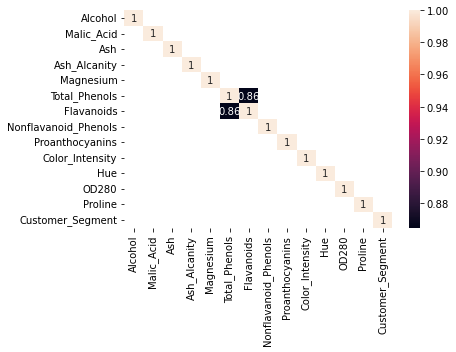

In [19]:
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

High correlation exists between Flavanoids and Total Phenols.(0.86)

## 4.PCA

In [20]:
df_wine1=df_wine.copy()

In [21]:
#Separating the dependent and independent variables

In [22]:
X=df_wine1.drop('Customer_Segment',axis=1)
y=df_wine1['Customer_Segment']

In [23]:
#Standard Scaling the data

In [24]:
sc=StandardScaler()

In [25]:
X_scaled=sc.fit_transform(X)
df_X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
df_X_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [26]:
pca=PCA()

In [27]:
pca_wine1=pca.fit_transform(df_X_scaled)

In [28]:
pca_wine1[:2]

array([[ 3.35814747, -1.52022185, -0.12637492, -0.22435626,  0.71089096,
        -0.17664455,  0.70115415,  0.01918672,  0.6892566 , -1.03120871,
        -0.35905487,  0.59934286, -0.1082988 ],
       [ 2.22921481,  0.33326137, -2.04283756, -0.36578314, -0.10744766,
        -0.98490211,  0.04800137,  0.9916492 , -0.37966369, -0.20878677,
        -0.12060222,  0.3722891 ,  0.00364028]])

In [29]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.36475803 0.56085577 0.66996759 0.74059137 0.8035612  0.85171187
 0.89202691 0.91947224 0.9417974  0.96110846 0.97866279 0.99192912
 1.        ]


With 10 columns, we can capture 96% of variance in data

In [30]:
df_pca_wine1=pd.DataFrame(pca_wine1[:,:10])
df_pca_wine1.head()

,0,1,2,3,4,5,6,7,8,9
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0.019187,0.689257,-1.031209
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0.991649,-0.379664,-0.208787
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,-0.464401,-1.164755,-0.136538
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0.694895,0.001904,-0.241293
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0.377559,0.283486,0.036566


In [31]:
#splitting into train and test set

In [32]:
X_train,X_test,y_train,y_test=train_test_split(df_pca_wine1,y,test_size=0.20,random_state=1)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 10), (36, 10), (142,), (36,))

## 5.Model Building

In [35]:
## KNN Classifier with 10 columns

In [36]:
k_values=range(3,21)

In [37]:
acc_score={}

In [38]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred_values=knn.predict(X_test)
    acc_score[k]=accuracy_score(y_test,pred_values)

In [39]:
max(acc_score.values())

0.9722222222222222

In [40]:
max(acc_score,key=acc_score.get)

3

In [41]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_values=knn.predict(X_test)

In [42]:
cm=confusion_matrix(y_test,pred_values)
cm

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  9]], dtype=int64)

In [43]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.92      0.96        13
         3.0       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



We can see that the model accuracy is 97%.

In [44]:
#tabulating the results

In [45]:
cols=['Model','Accuracy']

result=pd.DataFrame(columns=cols)

KNN_PCA_metrics=pd.Series({'Model':'KNN_PCA',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(KNN_PCA_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222


In [47]:
#SVM Classifier

1.Linear Kernel

In [48]:
svc1=SVC(kernel='linear')

In [49]:
svc1.fit(X_train,y_train)

SVC(kernel='linear')

In [50]:
pred_values=svc1.predict(X_test)

In [51]:
cm1=confusion_matrix(y_test,pred_values)
cm1

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [52]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.92      0.92      0.92        13
         3.0       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [53]:
#tabulating the result
SVM_linear_metrics=pd.Series({'Model':'SVM_linear',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(SVM_linear_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222
1,SVM_linear,0.944444


2.Radial Kernel

In [54]:
svc2=SVC(kernel='rbf')

In [55]:
svc2.fit(X_train,y_train)

SVC()

In [56]:
pred_values=svc2.predict(X_test)

In [57]:
cm2=confusion_matrix(y_test,pred_values)
cm2

array([[14,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  8]], dtype=int64)

In [58]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       0.93      1.00      0.96        13
         3.0       1.00      0.89      0.94         9

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



In [59]:
#tabulating the result
SVM_radial_metrics=pd.Series({'Model':'SVM_radial',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(SVM_radial_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222
1,SVM_linear,0.944444
2,SVM_radial,0.972222


3.Sigmoid Kernel

In [60]:
svc3=SVC(kernel='sigmoid')

In [61]:
svc3.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [62]:
pred_values=svc3.predict(X_test)

In [63]:
cm3=confusion_matrix(y_test,pred_values)
cm3

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  9]], dtype=int64)

In [64]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.92      0.96        13
         3.0       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [65]:
#tabulating the result
SVM_sigmoid_metrics=pd.Series({'Model':'SVM_sigmoid',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(SVM_sigmoid_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222
1,SVM_linear,0.944444
2,SVM_radial,0.972222
3,SVM_sigmoid,0.972222


4.Poly Kernel

In [66]:
svc4=SVC(kernel='poly')

In [67]:
svc4.fit(X_train,y_train)

SVC(kernel='poly')

In [68]:
pred_values=svc4.predict(X_test)

In [69]:
cm4=confusion_matrix(y_test,pred_values)
cm4

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [70]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.92      0.92      0.92        13
         3.0       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



In [71]:
#tabulating the result
SVM_poly_metrics=pd.Series({'Model':'SVM_poly',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(SVM_poly_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222
1,SVM_linear,0.944444
2,SVM_radial,0.972222
3,SVM_sigmoid,0.972222
4,SVM_poly,0.944444


5.Poly Kernel with GridSearchCV

In [72]:
tuned_parameters={'degree':[2,4,6],'gamma':['auto','scale'],'C':[0.25,0.50,1]}

In [73]:
gs_model=GridSearchCV(estimator=SVC(kernel='poly'),param_grid=tuned_parameters,scoring='accuracy',cv=5)
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.25, 0.5, 1], 'degree': [2, 4, 6],
                         'gamma': ['auto', 'scale']},
             scoring='accuracy')

In [74]:
print('The best parameters are: ',gs_model.best_params_)

The best parameters are:  {'C': 1, 'degree': 2, 'gamma': 'scale'}


In [75]:
#Rebuilding the model using tuned parameters

In [76]:
svc5=SVC(kernel='poly',C=1,degree=2,gamma='scale')

In [77]:
svc5.fit(X_train,y_train)

SVC(C=1, degree=2, kernel='poly')

In [78]:
pred_results=svc5.predict(X_test)

In [79]:
cm5=confusion_matrix(y_test,pred_values)
cm5

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [80]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.92      0.92      0.92        13
         3.0       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



From above,SVM with Sigmoid kernel has the best accuracy(0.97)

In [81]:
#tabulating the result
SVM_poly_GridSearchCV_metrics=pd.Series({'Model':'SVM_poly_GridSearchCV',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(SVM_poly_GridSearchCV_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222
1,SVM_linear,0.944444
2,SVM_radial,0.972222
3,SVM_sigmoid,0.972222
4,SVM_poly,0.944444
5,SVM_poly_GridSearchCV,0.944444


In [82]:
#Naive Bayes Classifier

In [83]:
gnb=GaussianNB()

In [84]:
gnb.fit(X_train,y_train)

GaussianNB()

In [85]:
pred_values=gnb.predict(X_test)

In [86]:
cm6=confusion_matrix(y_test,pred_values)
cm6

array([[14,  0,  0],
       [ 1, 12,  0],
       [ 0,  1,  8]], dtype=int64)

In [87]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

         1.0       0.93      1.00      0.97        14
         2.0       0.92      0.92      0.92        13
         3.0       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



Naive bayes model has an accuracy of 94% but it has a slightly lower recall score as compared to other models.

In [88]:
#6.Model Comparision

In [89]:
#tabulating the result
NB_metrics=pd.Series({'Model':'NB',
                            'Accuracy':accuracy_score(y_test,pred_values),
                             })
result=result.append(NB_metrics,ignore_index=True)

result

,Model,Accuracy
0,KNN_PCA,0.972222
1,SVM_linear,0.944444
2,SVM_radial,0.972222
3,SVM_sigmoid,0.972222
4,SVM_poly,0.944444
5,SVM_poly_GridSearchCV,0.944444
6,NB,0.944444


From above, we can see that after performing PCA,SVM sigmoid model is the best with model accuracy of 97%.